# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Ripple vs SEC hopium continues to keep XRP investors excited….  Ripple supporters have grown confident about winning as the ongoing lawsuit continues to make headlines even after 13 months. The effects of the same are visible on the network. Despite a tense market structure, activity hasn&#8217;t come down. SEC &#8220;Denied&#8221; On 24 February, District Judge Torres gave a simple one-word reply-&#8220;Denied&#8221;- to SEC&#8217;s Motion to [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/ripple-vs-sec-hopium-continues-to-keep-xrp-investors/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Alberta lifting almost all remaining COVID-19 restrictions March 1 | CBC News.  Most remaining public health restrictions will be lifted in Alberta on Tuesday as the province proceeds with the second phase of moving to an endemic approach to COVID-19. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/edmonton/alberta-covid-19-step-2-restrictions-lifted-1.6365902) 

### Kainų kaita pandemijos metu

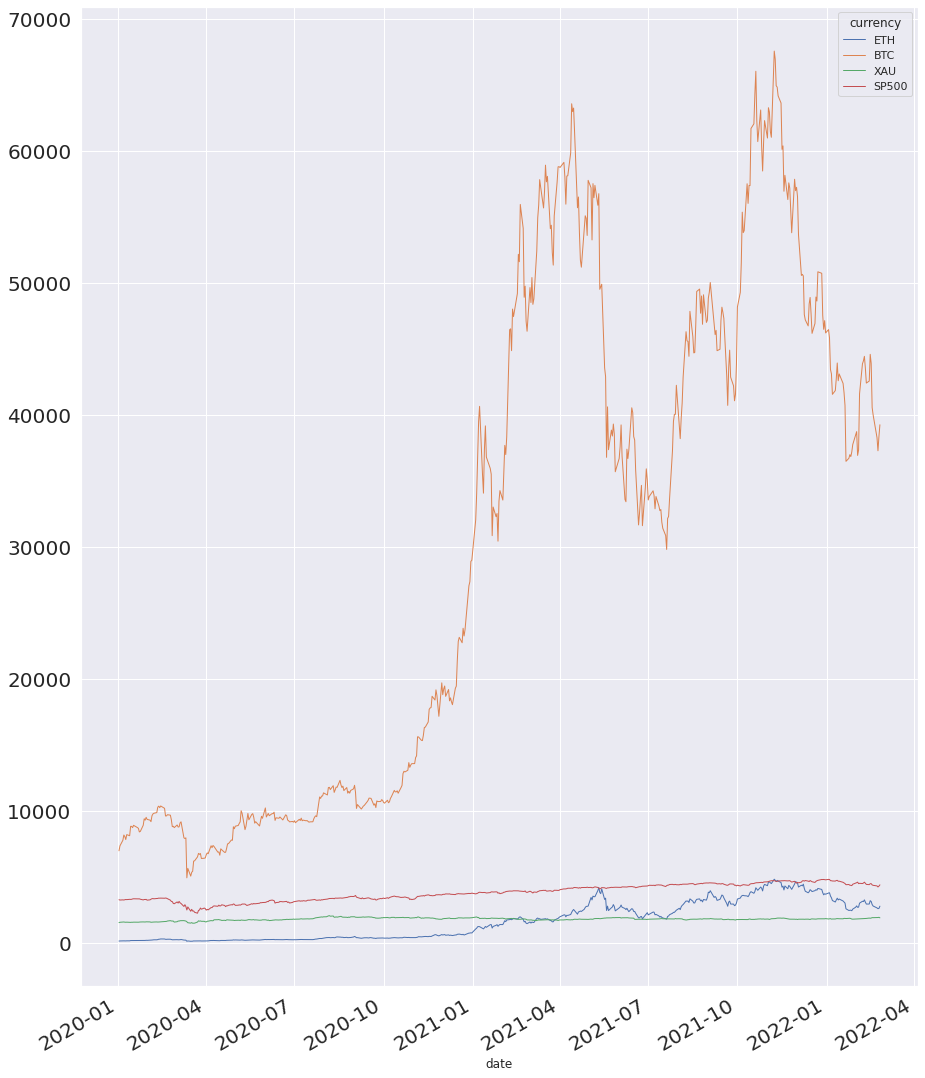

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903414,0.171115,0.919514
BTC,0.903414,1.000000,0.147797,0.871609
XAU,0.171115,0.147797,1.000000,0.314503
SP500,0.919514,0.871609,0.314503,1.000000


In [8]:
#hide ### Koreliacijos matrica.

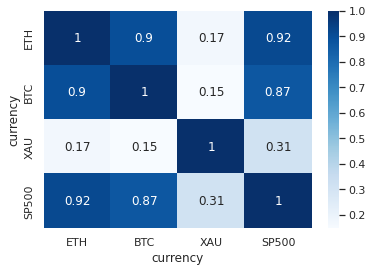

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')